In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

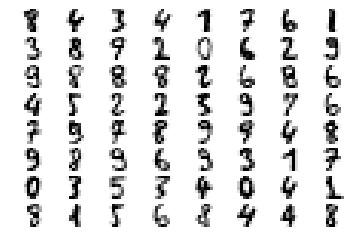

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.52948 stdev: 0.15433
Best fitness: 0.94154 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.348
Mean genetic distance 2.828, standard deviation 0.452
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 1.765 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62775 stdev: 0.18539
Best fitness: 0.98769 - size: (3, 15) - species 3 - id 350
Average adjusted fitness: 0.496
Mean genetic distance 2.878, standard deviation 0.492
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 2.460 sec (2.112 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64380 stdev: 0.19526
Best fitness: 0.98769 - size: (3, 15) - species 15 - id 350
Average adjusted fitness: 0.556
Mean genetic distance 2.913, standard deviation 0.503
Population of 200 members in 24 species
Total extincti

Population's average fitness: 0.81009 stdev: 0.19458
Best fitness: 0.99692 - size: (8, 23) - species 18 - id 2086
Average adjusted fitness: 0.479
Mean genetic distance 3.199, standard deviation 0.514
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 2.721 sec (2.881 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.81450 stdev: 0.20757
Best fitness: 0.99692 - size: (8, 23) - species 18 - id 2086
Average adjusted fitness: 0.767
Mean genetic distance 3.215, standard deviation 0.535
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 2.433 sec (2.831 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.79560 stdev: 0.21054
Best fitness: 0.99692 - size: (8, 23) - species 18 - id 2086
Average adjusted fitness: 0.713
Mean genetic distance 3.255, standard deviation 0.543
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 2.679 sec (2.826 average)

 ******

Mean genetic distance 2.992, standard deviation 0.476
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 1.950 sec (1.876 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65719 stdev: 0.19037
Best fitness: 0.99083 - size: (3, 16) - species 1 - id 509
Average adjusted fitness: 0.465
Mean genetic distance 3.017, standard deviation 0.497
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 2.320 sec (2.024 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66829 stdev: 0.20890
Best fitness: 0.99388 - size: (4, 17) - species 23 - id 622
Average adjusted fitness: 0.594
Mean genetic distance 3.038, standard deviation 0.483
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 2.030 sec (2.026 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67583 stdev: 0.21181
Best fitness: 0.99388 - size: (6, 19) - species 27 - id 796
Average

Population's average fitness: 0.76477 stdev: 0.19780
Best fitness: 0.99381 - size: (3, 16) - species 13 - id 1700
Average adjusted fitness: 0.611
Mean genetic distance 3.201, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 2.642 sec (2.476 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.77963 stdev: 0.19049
Best fitness: 0.99381 - size: (3, 16) - species 13 - id 1700
Average adjusted fitness: 0.553
Mean genetic distance 3.174, standard deviation 0.490
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 2.482 sec (2.480 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.78330 stdev: 0.19375
Best fitness: 0.99381 - size: (6, 20) - species 4 - id 2927
Average adjusted fitness: 0.519
Mean genetic distance 3.198, standard deviation 0.499
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 2.351 sec (2.467 average)

 ****** 

Population's average fitness: 0.73545 stdev: 0.20405
Best fitness: 0.99690 - size: (7, 22) - species 27 - id 4377
Average adjusted fitness: 0.526
Mean genetic distance 3.192, standard deviation 0.611
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 3.931 sec (3.015 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.75631 stdev: 0.19542
Best fitness: 0.99690 - size: (7, 22) - species 27 - id 4377
Average adjusted fitness: 0.643
Mean genetic distance 3.225, standard deviation 0.590
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 3.831 sec (3.124 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.74857 stdev: 0.19415
Best fitness: 0.99690 - size: (7, 22) - species 27 - id 4377
Average adjusted fitness: 0.483
Mean genetic distance 3.211, standard deviation 0.582
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 3.105 sec (3.138 average)

 ******

Mean genetic distance 3.219, standard deviation 0.485
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 3.449 sec (4.028 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74779 stdev: 0.19766
Best fitness: 0.98773 - size: (4, 16) - species 5 - id 1906
Average adjusted fitness: 0.636
Mean genetic distance 3.214, standard deviation 0.472
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 4.235 sec (4.168 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74554 stdev: 0.19889
Best fitness: 0.98773 - size: (4, 16) - species 5 - id 1906
Average adjusted fitness: 0.632
Mean genetic distance 3.237, standard deviation 0.475
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 4.823 sec (4.176 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75592 stdev: 0.19303
Best fitness: 0.99080 - size: (5, 17) - species 37 - id 2130
Av

Mean genetic distance 3.381, standard deviation 0.504
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 8.920 sec (7.560 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.79462 stdev: 0.18764
Best fitness: 0.99693 - size: (6, 19) - species 25 - id 4918
Average adjusted fitness: 0.382
Mean genetic distance 3.371, standard deviation 0.510
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.406 sec (7.526 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.77444 stdev: 0.18717
Best fitness: 0.99693 - size: (6, 19) - species 25 - id 4918
Average adjusted fitness: 0.342
Mean genetic distance 3.384, standard deviation 0.509
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 6.521 sec (7.563 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.80591 stdev: 0.18466
Best fitness: 0.99693 - size: (6, 19) - species 25 - id 4918


Mean genetic distance 3.287, standard deviation 0.592
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 5.350 sec (5.137 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.81245 stdev: 0.18491
Best fitness: 0.99693 - size: (6, 19) - species 25 - id 4918
Average adjusted fitness: 0.678
Mean genetic distance 3.258, standard deviation 0.590
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 5.376 sec (5.184 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.77460 stdev: 0.21224
Best fitness: 0.99693 - size: (11, 26) - species 59 - id 8758
Average adjusted fitness: 0.654
Mean genetic distance 3.232, standard deviation 0.624
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 5.376 sec (5.231 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.77745 stdev: 0.19251
Best fitness: 0.99693 - size: (11, 26) - species 59 - id 875

Population's average fitness: 0.74000 stdev: 0.19749
Best fitness: 0.99689 - size: (5, 20) - species 35 - id 1056
Average adjusted fitness: 0.548
Mean genetic distance 3.044, standard deviation 0.475
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.805 sec (3.420 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73318 stdev: 0.20735
Best fitness: 1.00000 - size: (4, 15) - species 29 - id 1184

Best individual in generation 7 meets fitness threshold - complexity: (4, 15)
Class1:0 #class1:162
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.49124 stdev: 0.13105
Best fitness: 0.92163 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.453
Mean genetic distance 2.920, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 2.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56810 stdev: 0.14994
Best 

Population's average fitness: 0.71613 stdev: 0.18188
Best fitness: 0.99074 - size: (5, 20) - species 31 - id 1265
Average adjusted fitness: 0.572
Mean genetic distance 3.157, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 3.896 sec (3.622 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71448 stdev: 0.18404
Best fitness: 0.99074 - size: (5, 20) - species 31 - id 1265
Average adjusted fitness: 0.488
Mean genetic distance 3.192, standard deviation 0.474
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 4.096 sec (3.747 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74443 stdev: 0.18030
Best fitness: 0.99074 - size: (5, 20) - species 31 - id 1265
Average adjusted fitness: 0.503
Mean genetic distance 3.223, standard deviation 0.483
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 3.960 sec (3.819 average)

 ******

Mean genetic distance 3.188, standard deviation 0.469
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 3.945 sec (3.984 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70792 stdev: 0.13764
Best fitness: 0.94737 - size: (4, 17) - species 2 - id 532
Average adjusted fitness: 0.303
Mean genetic distance 3.196, standard deviation 0.473
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 4.190 sec (3.993 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69904 stdev: 0.14416
Best fitness: 0.94737 - size: (4, 17) - species 2 - id 532
Average adjusted fitness: 0.441
Mean genetic distance 3.160, standard deviation 0.479
Population of 200 members in 47 species
Total extinctions: 0
Generation time: 3.845 sec (3.991 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71036 stdev: 0.14231
Best fitness: 0.94737 - size: (4, 17) - species 2 - id 532
Averag

Mean genetic distance 3.195, standard deviation 0.524
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.587 sec (4.404 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.71331 stdev: 0.17600
Best fitness: 0.96594 - size: (9, 22) - species 45 - id 5013
Average adjusted fitness: 0.484
Mean genetic distance 3.184, standard deviation 0.515
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 4.682 sec (4.468 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.72481 stdev: 0.16294
Best fitness: 0.96594 - size: (9, 22) - species 45 - id 5013
Average adjusted fitness: 0.365
Mean genetic distance 3.202, standard deviation 0.535
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 4.630 sec (4.514 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73568 stdev: 0.16007
Best fitness: 0.96594 - size: (9, 22) - species 45 - id 5013


Mean genetic distance 3.261, standard deviation 0.542
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.687 sec (4.904 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75864 stdev: 0.17618
Best fitness: 0.98452 - size: (6, 23) - species 47 - id 7349
Average adjusted fitness: 0.562
Mean genetic distance 3.255, standard deviation 0.553
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 4.965 sec (4.917 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.75075 stdev: 0.17214
Best fitness: 0.98452 - size: (6, 23) - species 47 - id 7349
Average adjusted fitness: 0.426
Mean genetic distance 3.269, standard deviation 0.562
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 4.901 sec (4.924 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.77485 stdev: 0.15433
Best fitness: 0.99071 - size: (9, 27) - species 54 - id 9132


Mean genetic distance 3.282, standard deviation 0.504
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.902 sec (3.848 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72791 stdev: 0.17726
Best fitness: 0.99390 - size: (5, 18) - species 22 - id 1382
Average adjusted fitness: 0.446
Mean genetic distance 3.322, standard deviation 0.507
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 4.061 sec (3.885 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73861 stdev: 0.17815
Best fitness: 0.99390 - size: (5, 18) - species 22 - id 1382
Average adjusted fitness: 0.529
Mean genetic distance 3.319, standard deviation 0.497
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 4.005 sec (3.902 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73217 stdev: 0.17367
Best fitness: 0.99390 - size: (5, 18) - species 22 - id 1382


Mean genetic distance 3.310, standard deviation 0.554
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.310 sec (4.210 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75472 stdev: 0.16860
Best fitness: 0.99695 - size: (10, 28) - species 37 - id 5734
Average adjusted fitness: 0.354
Mean genetic distance 3.298, standard deviation 0.574
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.470 sec (4.225 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.74090 stdev: 0.17100
Best fitness: 0.99695 - size: (10, 28) - species 37 - id 5734
Average adjusted fitness: 0.374
Mean genetic distance 3.297, standard deviation 0.583
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.410 sec (4.249 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76408 stdev: 0.16624
Best fitness: 0.99695 - size: (10, 28) - species 37 - id 57

Population's average fitness: 0.68662 stdev: 0.14598
Best fitness: 0.93519 - size: (5, 17) - species 26 - id 1630
Average adjusted fitness: 0.298
Mean genetic distance 3.110, standard deviation 0.493
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.881 sec (3.544 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69657 stdev: 0.14703
Best fitness: 0.93519 - size: (5, 17) - species 26 - id 1630
Average adjusted fitness: 0.428
Mean genetic distance 3.132, standard deviation 0.495
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 3.670 sec (3.581 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70767 stdev: 0.14698
Best fitness: 0.93519 - size: (5, 17) - species 26 - id 1630
Average adjusted fitness: 0.523
Mean genetic distance 3.161, standard deviation 0.482
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 3.799 sec (3.620 average)

 ******

Population's average fitness: 0.71491 stdev: 0.16346
Best fitness: 0.95062 - size: (8, 23) - species 26 - id 5020
Average adjusted fitness: 0.402
Mean genetic distance 3.246, standard deviation 0.552
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 4.523 sec (4.317 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.71203 stdev: 0.16608
Best fitness: 0.95062 - size: (8, 23) - species 26 - id 5020
Average adjusted fitness: 0.598
Mean genetic distance 3.268, standard deviation 0.555
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.681 sec (4.376 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.71157 stdev: 0.16285
Best fitness: 0.95062 - size: (8, 24) - species 26 - id 5331
Average adjusted fitness: 0.358
Mean genetic distance 3.273, standard deviation 0.546
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 4.515 sec (4.412 average)

 ******

Population's average fitness: 0.70453 stdev: 0.16438
Best fitness: 0.97222 - size: (12, 38) - species 23 - id 7048
Average adjusted fitness: 0.504
Mean genetic distance 3.288, standard deviation 0.545
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 5.154 sec (4.968 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.72211 stdev: 0.16564
Best fitness: 0.97222 - size: (12, 38) - species 23 - id 7048
Average adjusted fitness: 0.405
Mean genetic distance 3.274, standard deviation 0.545
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 5.274 sec (5.023 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.72015 stdev: 0.16178
Best fitness: 0.97222 - size: (12, 38) - species 23 - id 7048
Average adjusted fitness: 0.325
Mean genetic distance 3.288, standard deviation 0.538
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.303 sec (5.062 average)

 ***

Population's average fitness: 0.75582 stdev: 0.16336
Best fitness: 0.97554 - size: (6, 21) - species 28 - id 2211
Average adjusted fitness: 0.405
Mean genetic distance 3.067, standard deviation 0.509
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 3.780 sec (3.843 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74344 stdev: 0.16710
Best fitness: 0.97554 - size: (6, 21) - species 28 - id 2211
Average adjusted fitness: 0.413
Mean genetic distance 3.050, standard deviation 0.524
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 3.858 sec (3.847 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74558 stdev: 0.16986
Best fitness: 0.97859 - size: (5, 19) - species 31 - id 2696
Average adjusted fitness: 0.483
Mean genetic distance 3.052, standard deviation 0.515
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 3.977 sec (3.872 average)

 ******

Population's average fitness: 0.74501 stdev: 0.17669
Best fitness: 0.98471 - size: (7, 21) - species 38 - id 5730
Average adjusted fitness: 0.569
Mean genetic distance 3.220, standard deviation 0.533
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.156 sec (4.315 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.73932 stdev: 0.17000
Best fitness: 0.98471 - size: (7, 21) - species 38 - id 5730
Average adjusted fitness: 0.581
Mean genetic distance 3.218, standard deviation 0.546
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.345 sec (4.342 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.73301 stdev: 0.17894
Best fitness: 0.98471 - size: (7, 21) - species 38 - id 5730
Average adjusted fitness: 0.525
Mean genetic distance 3.232, standard deviation 0.537
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 4.429 sec (4.357 average)

 ******

Population's average fitness: 0.71286 stdev: 0.16889
Best fitness: 0.99083 - size: (8, 24) - species 38 - id 7595
Average adjusted fitness: 0.411
Mean genetic distance 3.182, standard deviation 0.558
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 5.030 sec (4.736 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74494 stdev: 0.16370
Best fitness: 0.99083 - size: (8, 28) - species 31 - id 9744
Average adjusted fitness: 0.581
Mean genetic distance 3.162, standard deviation 0.561
Population of 204 members in 20 species
Total extinctions: 0
Generation time: 4.716 sec (4.747 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.73988 stdev: 0.16824
Best fitness: 0.99083 - size: (8, 28) - species 31 - id 9744
Average adjusted fitness: 0.628
Mean genetic distance 3.183, standard deviation 0.585
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.824 sec (4.768 average)
Class1:1

Population's average fitness: 0.72405 stdev: 0.17434
Best fitness: 0.99080 - size: (4, 16) - species 12 - id 1933
Average adjusted fitness: 0.524
Mean genetic distance 3.155, standard deviation 0.503
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 3.924 sec (3.912 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74541 stdev: 0.18520
Best fitness: 0.99080 - size: (4, 16) - species 12 - id 1933
Average adjusted fitness: 0.601
Mean genetic distance 3.166, standard deviation 0.496
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 4.012 sec (3.931 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.72687 stdev: 0.18467
Best fitness: 0.99080 - size: (4, 16) - species 12 - id 1933
Average adjusted fitness: 0.595
Mean genetic distance 3.181, standard deviation 0.488
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 3.926 sec (3.941 average)

 ******

Population's average fitness: 0.75891 stdev: 0.18734
Best fitness: 0.99080 - size: (9, 28) - species 10 - id 4976
Average adjusted fitness: 0.608
Mean genetic distance 3.261, standard deviation 0.521
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.429 sec (4.320 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.77873 stdev: 0.18333
Best fitness: 0.99080 - size: (9, 28) - species 10 - id 4976
Average adjusted fitness: 0.666
Mean genetic distance 3.238, standard deviation 0.538
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.530 sec (4.341 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.77765 stdev: 0.18026
Best fitness: 0.99693 - size: (10, 30) - species 10 - id 6618
Average adjusted fitness: 0.441
Mean genetic distance 3.271, standard deviation 0.532
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.258 sec (4.339 average)

 *****

Mean genetic distance 3.136, standard deviation 0.534
Population of 190 members in 33 species
Total extinctions: 0
Generation time: 3.622 sec (3.521 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72733 stdev: 0.16235
Best fitness: 0.98452 - size: (4, 18) - species 24 - id 1684
Average adjusted fitness: 0.506
Mean genetic distance 3.140, standard deviation 0.543
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.494 sec (3.549 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74146 stdev: 0.15658
Best fitness: 0.98762 - size: (6, 20) - species 33 - id 2093
Average adjusted fitness: 0.316
Mean genetic distance 3.109, standard deviation 0.536
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.750 sec (3.584 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73602 stdev: 0.16644
Best fitness: 0.98762 - size: (6, 20) - species 33 - id 2093


Mean genetic distance 3.276, standard deviation 0.598
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 4.156 sec (4.053 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.74422 stdev: 0.15357
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082
Average adjusted fitness: 0.397
Mean genetic distance 3.271, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 4.439 sec (4.125 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.72187 stdev: 0.16527
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082
Average adjusted fitness: 0.417
Mean genetic distance 3.236, standard deviation 0.606
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.073 sec (4.150 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.73905 stdev: 0.16027
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082


Mean genetic distance 3.150, standard deviation 0.582
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.445 sec (4.274 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.75367 stdev: 0.16212
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082
Average adjusted fitness: 0.421
Mean genetic distance 3.160, standard deviation 0.580
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.490 sec (4.294 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.76551 stdev: 0.15402
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082
Average adjusted fitness: 0.385
Mean genetic distance 3.142, standard deviation 0.597
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.340 sec (4.309 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.75867 stdev: 0.16517
Best fitness: 0.99690 - size: (5, 19) - species 25 - id 5082


Mean genetic distance 3.157, standard deviation 0.460
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 3.803 sec (3.764 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65758 stdev: 0.13472
Best fitness: 0.89687 - size: (5, 17) - species 37 - id 2287
Average adjusted fitness: 0.301
Mean genetic distance 3.175, standard deviation 0.469
Population of 188 members in 37 species
Total extinctions: 0
Generation time: 3.880 sec (3.783 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66420 stdev: 0.13329
Best fitness: 0.89687 - size: (5, 17) - species 37 - id 2287
Average adjusted fitness: 0.306
Mean genetic distance 3.189, standard deviation 0.471
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 3.663 sec (3.779 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65941 stdev: 0.13642
Best fitness: 0.89687 - size: (5, 17) - species 37 - id 2287


Mean genetic distance 3.295, standard deviation 0.513
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 4.123 sec (4.211 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.65784 stdev: 0.13430
Best fitness: 0.91563 - size: (5, 18) - species 35 - id 4211
Average adjusted fitness: 0.306
Mean genetic distance 3.286, standard deviation 0.524
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.470 sec (4.245 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.67418 stdev: 0.13050
Best fitness: 0.91563 - size: (5, 18) - species 35 - id 4211
Average adjusted fitness: 0.201
Mean genetic distance 3.291, standard deviation 0.533
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.546 sec (4.298 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.67963 stdev: 0.13863
Best fitness: 0.91563 - size: (5, 18) - species 35 - id 4211


Mean genetic distance 3.297, standard deviation 0.528
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.691 sec (4.608 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.66160 stdev: 0.14146
Best fitness: 0.92812 - size: (7, 24) - species 35 - id 8545
Average adjusted fitness: 0.438
Mean genetic distance 3.273, standard deviation 0.528
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.714 sec (4.620 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.66500 stdev: 0.13462
Best fitness: 0.92812 - size: (7, 24) - species 35 - id 8545
Average adjusted fitness: 0.233
Mean genetic distance 3.248, standard deviation 0.528
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.622 sec (4.628 average)
Class1:1 #class1:163
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.48169 stdev: 0.12827
Best fitness: 0.9384

Mean genetic distance 3.208, standard deviation 0.508
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.849 sec (3.816 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71904 stdev: 0.15700
Best fitness: 0.96615 - size: (3, 17) - species 25 - id 795
Average adjusted fitness: 0.488
Mean genetic distance 3.190, standard deviation 0.499
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.029 sec (3.850 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73046 stdev: 0.16297
Best fitness: 0.96615 - size: (3, 17) - species 25 - id 795
Average adjusted fitness: 0.478
Mean genetic distance 3.200, standard deviation 0.503
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 3.854 sec (3.849 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.72117 stdev: 0.16784
Best fitness: 0.96615 - size: (3, 17) - species 25 - id 795
Ave

Mean genetic distance 3.237, standard deviation 0.538
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.323 sec (4.246 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.73523 stdev: 0.16538
Best fitness: 0.97538 - size: (8, 22) - species 35 - id 6494
Average adjusted fitness: 0.509
Mean genetic distance 3.183, standard deviation 0.575
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 4.584 sec (4.292 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.69808 stdev: 0.16277
Best fitness: 0.97538 - size: (8, 22) - species 35 - id 6494
Average adjusted fitness: 0.362
Mean genetic distance 3.184, standard deviation 0.585
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 4.535 sec (4.325 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.68710 stdev: 0.15984
Best fitness: 0.97538 - size: (8, 22) - species 35 - id 6494


Mean genetic distance 3.006, standard deviation 0.480
Population of 206 members in 30 species
Total extinctions: 0
Generation time: 3.182 sec (3.037 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59824 stdev: 0.14630
Best fitness: 0.89846 - size: (3, 14) - species 1 - id 334
Average adjusted fitness: 0.468
Mean genetic distance 3.035, standard deviation 0.502
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 3.387 sec (3.125 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60802 stdev: 0.15623
Best fitness: 0.91077 - size: (2, 12) - species 17 - id 789
Average adjusted fitness: 0.422
Mean genetic distance 3.077, standard deviation 0.488
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.512 sec (3.202 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64689 stdev: 0.15324
Best fitness: 0.91692 - size: (4, 19) - species 16 - id 900
Average

Mean genetic distance 3.221, standard deviation 0.508
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 4.344 sec (4.209 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.74644 stdev: 0.17494
Best fitness: 0.95692 - size: (9, 28) - species 39 - id 3150
Average adjusted fitness: 0.372
Mean genetic distance 3.234, standard deviation 0.510
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 4.409 sec (4.237 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73523 stdev: 0.17902
Best fitness: 0.95692 - size: (9, 28) - species 39 - id 3150
Average adjusted fitness: 0.407
Mean genetic distance 3.223, standard deviation 0.524
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 4.213 sec (4.241 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.72649 stdev: 0.18999
Best fitness: 0.95692 - size: (9, 28) - species 39 - id 3150


Mean genetic distance 3.303, standard deviation 0.555
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.756 sec (4.655 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.76235 stdev: 0.16997
Best fitness: 0.97231 - size: (9, 26) - species 19 - id 7014
Average adjusted fitness: 0.403
Mean genetic distance 3.275, standard deviation 0.559
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.726 sec (4.680 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.76393 stdev: 0.18419
Best fitness: 0.97231 - size: (10, 28) - species 19 - id 7514
Average adjusted fitness: 0.486
Mean genetic distance 3.309, standard deviation 0.541
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 4.797 sec (4.693 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.76115 stdev: 0.18107
Best fitness: 0.97538 - size: (11, 30) - species 19 - id 783

Mean genetic distance 3.179, standard deviation 0.513
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 3.371 sec (3.208 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73740 stdev: 0.18143
Best fitness: 0.98131 - size: (5, 18) - species 28 - id 630
Average adjusted fitness: 0.456
Mean genetic distance 3.177, standard deviation 0.515
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 3.566 sec (3.248 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74285 stdev: 0.18819
Best fitness: 0.98131 - size: (5, 18) - species 28 - id 630
Average adjusted fitness: 0.483
Mean genetic distance 3.178, standard deviation 0.508
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 3.598 sec (3.283 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76781 stdev: 0.19555
Best fitness: 0.98131 - size: (5, 18) - species 28 - id 630
Avera

Mean genetic distance 3.247, standard deviation 0.530
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 4.101 sec (4.156 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.82316 stdev: 0.17467
Best fitness: 0.99688 - size: (8, 21) - species 4 - id 4770
Average adjusted fitness: 0.418
Mean genetic distance 3.248, standard deviation 0.541
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 4.428 sec (4.206 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.81062 stdev: 0.18287
Best fitness: 0.99688 - size: (8, 21) - species 4 - id 4770
Average adjusted fitness: 0.499
Mean genetic distance 3.252, standard deviation 0.536
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 4.551 sec (4.268 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.80197 stdev: 0.18078
Best fitness: 0.99688 - size: (8, 21) - species 4 - id 4770
Ave

Mean genetic distance 3.258, standard deviation 0.579
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.619 sec (4.604 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.80095 stdev: 0.19992
Best fitness: 0.99688 - size: (9, 27) - species 47 - id 7641
Average adjusted fitness: 0.530
Mean genetic distance 3.272, standard deviation 0.588
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.543 sec (4.621 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.81425 stdev: 0.18658
Best fitness: 0.99688 - size: (9, 27) - species 47 - id 7641
Average adjusted fitness: 0.557
Mean genetic distance 3.275, standard deviation 0.598
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.625 sec (4.588 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.80480 stdev: 0.20498
Best fitness: 0.99688 - size: (9, 27) - species 47 - id 7641


Population's average fitness: 0.74393 stdev: 0.16650
Best fitness: 0.98148 - size: (8, 23) - species 35 - id 1602
Average adjusted fitness: 0.525
Mean genetic distance 3.295, standard deviation 0.496
Population of 191 members in 40 species
Total extinctions: 0
Generation time: 3.965 sec (3.857 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.74961 stdev: 0.16519
Best fitness: 0.98148 - size: (8, 23) - species 35 - id 1602
Average adjusted fitness: 0.513
Mean genetic distance 3.336, standard deviation 0.480
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 3.895 sec (3.872 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74984 stdev: 0.16486
Best fitness: 0.98148 - size: (8, 23) - species 35 - id 1602
Average adjusted fitness: 0.471
Mean genetic distance 3.316, standard deviation 0.478
Population of 192 members in 38 species
Total extinctions: 0
Generation time: 3.928 sec (3.899 average)

 ******

Population's average fitness: 0.75550 stdev: 0.17687
Best fitness: 0.98148 - size: (9, 23) - species 35 - id 5744
Average adjusted fitness: 0.472
Mean genetic distance 3.410, standard deviation 0.584
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 4.346 sec (4.346 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.73875 stdev: 0.18207
Best fitness: 0.98148 - size: (8, 23) - species 35 - id 1602
Average adjusted fitness: 0.465
Mean genetic distance 3.387, standard deviation 0.604
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.376 sec (4.349 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76362 stdev: 0.17621
Best fitness: 0.98148 - size: (4, 16) - species 52 - id 6199
Average adjusted fitness: 0.461
Mean genetic distance 3.362, standard deviation 0.598
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 4.383 sec (4.358 average)

 ******

Population's average fitness: 0.56469 stdev: 0.15991
Best fitness: 0.95356 - size: (2, 13) - species 4 - id 161
Average adjusted fitness: 0.453
Mean genetic distance 2.934, standard deviation 0.508
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 3.027 sec (2.908 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59928 stdev: 0.17131
Best fitness: 0.97523 - size: (3, 15) - species 1 - id 469
Average adjusted fitness: 0.540
Mean genetic distance 3.039, standard deviation 0.482
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 3.175 sec (2.997 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64944 stdev: 0.18524
Best fitness: 0.97523 - size: (3, 15) - species 1 - id 469
Average adjusted fitness: 0.506
Mean genetic distance 3.086, standard deviation 0.459
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 3.343 sec (3.084 average)

 ****** Running

Mean genetic distance 3.205, standard deviation 0.477
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.780 sec (3.685 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.74705 stdev: 0.17470
Best fitness: 0.99375 - size: (6, 17) - species 28 - id 1332
Average adjusted fitness: 0.432
Mean genetic distance 3.199, standard deviation 0.485
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 3.885 sec (3.720 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74878 stdev: 0.17293
Best fitness: 0.99687 - size: (6, 16) - species 28 - id 2604
Average adjusted fitness: 0.364
Mean genetic distance 3.193, standard deviation 0.483
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 4.042 sec (3.755 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.77454 stdev: 0.17476
Best fitness: 0.99687 - size: (6, 16) - species 28 - id 2604


Population's average fitness: 0.67642 stdev: 0.13619
Best fitness: 0.91167 - size: (3, 16) - species 30 - id 837
Average adjusted fitness: 0.445
Mean genetic distance 3.086, standard deviation 0.504
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.524 sec (3.297 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67172 stdev: 0.14052
Best fitness: 0.91167 - size: (3, 16) - species 30 - id 837
Average adjusted fitness: 0.426
Mean genetic distance 3.077, standard deviation 0.498
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 3.560 sec (3.382 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67780 stdev: 0.13888
Best fitness: 0.91167 - size: (3, 16) - species 30 - id 837
Average adjusted fitness: 0.341
Mean genetic distance 3.100, standard deviation 0.480
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 3.650 sec (3.447 average)

 ****** Ru

Population's average fitness: 0.70572 stdev: 0.14537
Best fitness: 0.93691 - size: (7, 23) - species 17 - id 2870
Average adjusted fitness: 0.253
Mean genetic distance 3.242, standard deviation 0.523
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 3.908 sec (3.872 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.69822 stdev: 0.15034
Best fitness: 0.93691 - size: (7, 23) - species 17 - id 2870
Average adjusted fitness: 0.303
Mean genetic distance 3.236, standard deviation 0.528
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.953 sec (3.876 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.70435 stdev: 0.14684
Best fitness: 0.93691 - size: (7, 23) - species 17 - id 2870
Average adjusted fitness: 0.323
Mean genetic distance 3.241, standard deviation 0.530
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 3.973 sec (3.902 average)

 ******

Population's average fitness: 0.69751 stdev: 0.15051
Best fitness: 0.94953 - size: (6, 22) - species 33 - id 6019
Average adjusted fitness: 0.424
Mean genetic distance 3.174, standard deviation 0.626
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 4.222 sec (4.183 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.70519 stdev: 0.14948
Best fitness: 0.95268 - size: (7, 22) - species 33 - id 8771
Average adjusted fitness: 0.366
Mean genetic distance 3.188, standard deviation 0.610
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.307 sec (4.214 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.70360 stdev: 0.14531
Best fitness: 0.95268 - size: (7, 22) - species 33 - id 8771
Average adjusted fitness: 0.240
Mean genetic distance 3.210, standard deviation 0.593
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 4.342 sec (4.237 average)

 ******

Population's average fitness: 0.74330 stdev: 0.16905
Best fitness: 0.97516 - size: (5, 19) - species 3 - id 973
Average adjusted fitness: 0.407
Mean genetic distance 3.222, standard deviation 0.475
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.741 sec (3.690 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75480 stdev: 0.16534
Best fitness: 0.97516 - size: (5, 19) - species 3 - id 973
Average adjusted fitness: 0.467
Mean genetic distance 3.241, standard deviation 0.482
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 3.717 sec (3.701 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.75667 stdev: 0.16246
Best fitness: 0.97516 - size: (5, 19) - species 3 - id 973
Average adjusted fitness: 0.440
Mean genetic distance 3.228, standard deviation 0.489
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 3.762 sec (3.719 average)

 ****** Runni

Population's average fitness: 0.76811 stdev: 0.17385
Best fitness: 0.98758 - size: (5, 16) - species 15 - id 3034
Average adjusted fitness: 0.335
Mean genetic distance 3.247, standard deviation 0.536
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.195 sec (4.185 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.76874 stdev: 0.17836
Best fitness: 0.98758 - size: (5, 16) - species 15 - id 3034
Average adjusted fitness: 0.466
Mean genetic distance 3.219, standard deviation 0.529
Population of 205 members in 19 species
Total extinctions: 0
Generation time: 4.254 sec (4.134 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.75429 stdev: 0.17765
Best fitness: 0.98758 - size: (5, 16) - species 15 - id 3034
Average adjusted fitness: 0.370
Mean genetic distance 3.219, standard deviation 0.529
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 4.424 sec (4.159 average)

 ******

Population's average fitness: 0.78584 stdev: 0.17037
Best fitness: 0.99379 - size: (5, 16) - species 15 - id 8318
Average adjusted fitness: 0.615
Mean genetic distance 3.053, standard deviation 0.543
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.829 sec (4.655 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.78791 stdev: 0.17819
Best fitness: 0.99379 - size: (5, 16) - species 15 - id 8318
Average adjusted fitness: 0.575
Mean genetic distance 3.065, standard deviation 0.564
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 5.023 sec (4.707 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.79822 stdev: 0.15913
Best fitness: 0.99379 - size: (5, 16) - species 15 - id 8318
Average adjusted fitness: 0.319
Mean genetic distance 3.083, standard deviation 0.545
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 4.938 sec (4.760 average)

 ******

Population's average fitness: 0.80830 stdev: 0.19212
Best fitness: 0.99693 - size: (10, 28) - species 21 - id 2800
Average adjusted fitness: 0.646
Mean genetic distance 3.124, standard deviation 0.516
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 4.141 sec (3.983 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.81279 stdev: 0.18671
Best fitness: 0.99693 - size: (10, 28) - species 21 - id 2800
Average adjusted fitness: 0.488
Mean genetic distance 3.089, standard deviation 0.519
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.030 sec (3.990 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.80814 stdev: 0.18927
Best fitness: 0.99693 - size: (10, 28) - species 21 - id 2800
Average adjusted fitness: 0.562
Mean genetic distance 3.110, standard deviation 0.506
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.020 sec (4.014 average)

 ***

Mean genetic distance 3.297, standard deviation 0.501
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 3.749 sec (3.796 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71875 stdev: 0.17913
Best fitness: 0.98480 - size: (5, 17) - species 34 - id 1757
Average adjusted fitness: 0.518
Mean genetic distance 3.286, standard deviation 0.490
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 3.842 sec (3.746 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72295 stdev: 0.18265
Best fitness: 0.98480 - size: (5, 17) - species 34 - id 1757
Average adjusted fitness: 0.445
Mean genetic distance 3.276, standard deviation 0.488
Population of 187 members in 45 species
Total extinctions: 0
Generation time: 3.826 sec (3.721 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73672 stdev: 0.17745
Best fitness: 0.98480 - size: (6, 19) - species 34 - id 2245


Mean genetic distance 3.182, standard deviation 0.501
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 4.352 sec (4.308 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.77231 stdev: 0.17675
Best fitness: 0.98784 - size: (4, 17) - species 7 - id 3808
Average adjusted fitness: 0.512
Mean genetic distance 3.186, standard deviation 0.515
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.549 sec (4.343 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.77596 stdev: 0.18082
Best fitness: 0.98784 - size: (4, 17) - species 7 - id 3808
Average adjusted fitness: 0.624
Mean genetic distance 3.179, standard deviation 0.527
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 4.447 sec (4.367 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.78171 stdev: 0.17268
Best fitness: 0.98784 - size: (4, 17) - species 7 - id 3808
Ave

Mean genetic distance 3.048, standard deviation 0.561
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.029 sec (4.885 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.77992 stdev: 0.17645
Best fitness: 0.98784 - size: (7, 25) - species 52 - id 8521
Average adjusted fitness: 0.526
Mean genetic distance 3.062, standard deviation 0.546
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 4.999 sec (4.911 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.80388 stdev: 0.17760
Best fitness: 0.98784 - size: (7, 25) - species 52 - id 8521
Average adjusted fitness: 0.560
Mean genetic distance 3.068, standard deviation 0.554
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 5.067 sec (4.923 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.75932 stdev: 0.19557
Best fitness: 0.98784 - size: (7, 25) - species 52 - id 8521


Population's average fitness: 0.74369 stdev: 0.18741
Best fitness: 0.97231 - size: (3, 17) - species 15 - id 1421
Average adjusted fitness: 0.670
Mean genetic distance 3.136, standard deviation 0.492
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 3.879 sec (3.574 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74540 stdev: 0.17885
Best fitness: 0.97231 - size: (3, 17) - species 15 - id 1421
Average adjusted fitness: 0.452
Mean genetic distance 3.137, standard deviation 0.488
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 3.881 sec (3.654 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74384 stdev: 0.18224
Best fitness: 0.97231 - size: (3, 17) - species 15 - id 1421
Average adjusted fitness: 0.478
Mean genetic distance 3.125, standard deviation 0.482
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.800 sec (3.709 average)

 ******

Population's average fitness: 0.78350 stdev: 0.18446
Best fitness: 0.98154 - size: (5, 20) - species 15 - id 4466
Average adjusted fitness: 0.494
Mean genetic distance 3.280, standard deviation 0.511
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.397 sec (4.360 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.79437 stdev: 0.18100
Best fitness: 0.98154 - size: (3, 14) - species 43 - id 4883
Average adjusted fitness: 0.647
Mean genetic distance 3.288, standard deviation 0.521
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 4.528 sec (4.378 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.78240 stdev: 0.18786
Best fitness: 0.98154 - size: (5, 20) - species 15 - id 4466
Average adjusted fitness: 0.488
Mean genetic distance 3.305, standard deviation 0.522
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.512 sec (4.401 average)

 ******

Population's average fitness: 0.77842 stdev: 0.18758
Best fitness: 0.98769 - size: (5, 18) - species 43 - id 8340
Average adjusted fitness: 0.507
Mean genetic distance 3.197, standard deviation 0.614
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.682 sec (4.531 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.78347 stdev: 0.18135
Best fitness: 0.98769 - size: (11, 35) - species 30 - id 8651
Average adjusted fitness: 0.448
Mean genetic distance 3.217, standard deviation 0.608
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 4.871 sec (4.579 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.79166 stdev: 0.18076
Best fitness: 0.98769 - size: (11, 35) - species 30 - id 8651
Average adjusted fitness: 0.543
Mean genetic distance 3.242, standard deviation 0.604
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 4.717 sec (4.605 average)

 ****

Population's average fitness: 0.73025 stdev: 0.15367
Best fitness: 0.92236 - size: (8, 23) - species 10 - id 2193
Average adjusted fitness: 0.515
Mean genetic distance 3.164, standard deviation 0.465
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 3.800 sec (3.651 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71556 stdev: 0.15602
Best fitness: 0.92236 - size: (8, 23) - species 10 - id 2193
Average adjusted fitness: 0.333
Mean genetic distance 3.178, standard deviation 0.455
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 3.878 sec (3.679 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73185 stdev: 0.14732
Best fitness: 0.92236 - size: (8, 23) - species 10 - id 2193
Average adjusted fitness: 0.370
Mean genetic distance 3.178, standard deviation 0.458
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 3.701 sec (3.699 average)

 ******

Population's average fitness: 0.71996 stdev: 0.16211
Best fitness: 0.95963 - size: (11, 29) - species 45 - id 5119
Average adjusted fitness: 0.323
Mean genetic distance 3.201, standard deviation 0.565
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.318 sec (4.207 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.74526 stdev: 0.15167
Best fitness: 0.95963 - size: (11, 29) - species 45 - id 5119
Average adjusted fitness: 0.310
Mean genetic distance 3.205, standard deviation 0.570
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 4.406 sec (4.242 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.73527 stdev: 0.16333
Best fitness: 0.95963 - size: (11, 29) - species 45 - id 5119
Average adjusted fitness: 0.321
Mean genetic distance 3.236, standard deviation 0.555
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.301 sec (4.264 average)

 ***

Population's average fitness: 0.73241 stdev: 0.16493
Best fitness: 0.96273 - size: (12, 29) - species 45 - id 7731
Average adjusted fitness: 0.471
Mean genetic distance 3.282, standard deviation 0.591
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.122 sec (4.973 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.73329 stdev: 0.16309
Best fitness: 0.96273 - size: (12, 29) - species 45 - id 7731
Average adjusted fitness: 0.393
Mean genetic distance 3.299, standard deviation 0.573
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.246 sec (5.008 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.71656 stdev: 0.17170
Best fitness: 0.96273 - size: (12, 29) - species 45 - id 7731
Average adjusted fitness: 0.420
Mean genetic distance 3.298, standard deviation 0.567
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.365 sec (5.058 average)

 ***

Population's average fitness: 0.70910 stdev: 0.14909
Best fitness: 0.95107 - size: (5, 20) - species 26 - id 2678
Average adjusted fitness: 0.346
Mean genetic distance 3.143, standard deviation 0.506
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 4.028 sec (3.941 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.71472 stdev: 0.14872
Best fitness: 0.95107 - size: (5, 20) - species 26 - id 2678
Average adjusted fitness: 0.391
Mean genetic distance 3.179, standard deviation 0.504
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 4.153 sec (3.979 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71954 stdev: 0.14636
Best fitness: 0.95107 - size: (5, 20) - species 26 - id 2678
Average adjusted fitness: 0.317
Mean genetic distance 3.168, standard deviation 0.506
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 4.167 sec (4.014 average)

 ******

Population's average fitness: 0.70771 stdev: 0.17289
Best fitness: 0.95413 - size: (14, 40) - species 27 - id 5734
Average adjusted fitness: 0.394
Mean genetic distance 3.241, standard deviation 0.516
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.941 sec (4.764 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.70180 stdev: 0.16879
Best fitness: 0.95413 - size: (11, 27) - species 36 - id 6491
Average adjusted fitness: 0.383
Mean genetic distance 3.211, standard deviation 0.513
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 5.058 sec (4.818 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.70672 stdev: 0.16180
Best fitness: 0.95719 - size: (11, 27) - species 36 - id 6652
Average adjusted fitness: 0.289
Mean genetic distance 3.226, standard deviation 0.505
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.971 sec (4.860 average)

 ***

Population's average fitness: 0.56932 stdev: 0.15914
Best fitness: 0.94769 - size: (2, 13) - species 9 - id 113
Average adjusted fitness: 0.407
Mean genetic distance 2.980, standard deviation 0.475
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 3.165 sec (2.973 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62486 stdev: 0.15248
Best fitness: 0.96000 - size: (4, 15) - species 17 - id 517
Average adjusted fitness: 0.469
Mean genetic distance 3.019, standard deviation 0.485
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 3.222 sec (3.056 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62454 stdev: 0.17042
Best fitness: 0.97231 - size: (3, 17) - species 1 - id 657
Average adjusted fitness: 0.487
Mean genetic distance 3.038, standard deviation 0.502
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 3.300 sec (3.117 average)

 ****** Runnin

Population's average fitness: 0.79068 stdev: 0.18406
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.565
Mean genetic distance 3.217, standard deviation 0.497
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.224 sec (4.044 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.78122 stdev: 0.18894
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.523
Mean genetic distance 3.217, standard deviation 0.494
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.220 sec (4.089 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77370 stdev: 0.19514
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.593
Mean genetic distance 3.194, standard deviation 0.503
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 4.098 sec (4.127 average)

 ******

Population's average fitness: 0.78122 stdev: 0.18024
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.430
Mean genetic distance 3.255, standard deviation 0.558
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.392 sec (4.429 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.81181 stdev: 0.17983
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.670
Mean genetic distance 3.273, standard deviation 0.569
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.369 sec (4.418 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.81025 stdev: 0.18258
Best fitness: 0.99385 - size: (7, 21) - species 25 - id 2634
Average adjusted fitness: 0.590
Mean genetic distance 3.252, standard deviation 0.562
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.448 sec (4.434 average)

 ******

Population's average fitness: 0.70040 stdev: 0.17230
Best fitness: 0.97840 - size: (5, 18) - species 6 - id 825
Average adjusted fitness: 0.386
Mean genetic distance 3.160, standard deviation 0.488
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 3.546 sec (3.312 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.72143 stdev: 0.19289
Best fitness: 0.97840 - size: (5, 18) - species 6 - id 825
Average adjusted fitness: 0.669
Mean genetic distance 3.155, standard deviation 0.498
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 3.637 sec (3.352 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72838 stdev: 0.19415
Best fitness: 0.97840 - size: (5, 17) - species 15 - id 1315
Average adjusted fitness: 0.655
Mean genetic distance 3.158, standard deviation 0.500
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 3.700 sec (3.391 average)

 ****** Runni

Population's average fitness: 0.75931 stdev: 0.19497
Best fitness: 0.98457 - size: (7, 23) - species 6 - id 3382
Average adjusted fitness: 0.525
Mean genetic distance 3.218, standard deviation 0.540
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.007 sec (3.945 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.77011 stdev: 0.19541
Best fitness: 0.98457 - size: (7, 23) - species 6 - id 3382
Average adjusted fitness: 0.600
Mean genetic distance 3.227, standard deviation 0.538
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.117 sec (3.971 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.77423 stdev: 0.18704
Best fitness: 0.98765 - size: (4, 16) - species 3 - id 4354
Average adjusted fitness: 0.500
Mean genetic distance 3.209, standard deviation 0.550
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 4.121 sec (3.998 average)

 ****** Ru

Population's average fitness: 0.73004 stdev: 0.20710
Best fitness: 0.99074 - size: (9, 29) - species 51 - id 7588
Average adjusted fitness: 0.538
Mean genetic distance 3.287, standard deviation 0.607
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 4.401 sec (4.500 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75912 stdev: 0.18795
Best fitness: 0.99074 - size: (9, 29) - species 51 - id 7588
Average adjusted fitness: 0.469
Mean genetic distance 3.302, standard deviation 0.611
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.351 sec (4.434 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.74869 stdev: 0.18767
Best fitness: 0.99074 - size: (9, 29) - species 51 - id 7588
Average adjusted fitness: 0.310
Mean genetic distance 3.304, standard deviation 0.627
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.339 sec (4.427 average)

 ******

Population's average fitness: 0.71704 stdev: 0.17261
Best fitness: 0.97508 - size: (2, 14) - species 4 - id 677
Average adjusted fitness: 0.555
Mean genetic distance 3.103, standard deviation 0.532
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 3.548 sec (3.374 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71329 stdev: 0.16427
Best fitness: 0.97508 - size: (2, 14) - species 4 - id 677
Average adjusted fitness: 0.504
Mean genetic distance 3.090, standard deviation 0.519
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 3.912 sec (3.454 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72166 stdev: 0.16913
Best fitness: 0.97508 - size: (2, 14) - species 4 - id 677
Average adjusted fitness: 0.611
Mean genetic distance 3.104, standard deviation 0.525
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.907 sec (3.526 average)

 ****** Runni

Population's average fitness: 0.75968 stdev: 0.16904
Best fitness: 0.98131 - size: (8, 22) - species 31 - id 4044
Average adjusted fitness: 0.431
Mean genetic distance 3.103, standard deviation 0.599
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 4.343 sec (4.160 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.75804 stdev: 0.16488
Best fitness: 0.98131 - size: (8, 22) - species 31 - id 4044
Average adjusted fitness: 0.356
Mean genetic distance 3.118, standard deviation 0.599
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 4.309 sec (4.200 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.77701 stdev: 0.16996
Best fitness: 0.98131 - size: (8, 22) - species 31 - id 4044
Average adjusted fitness: 0.545
Mean genetic distance 3.113, standard deviation 0.593
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.256 sec (4.222 average)

 ******

Population's average fitness: 0.74309 stdev: 0.18163
Best fitness: 0.99065 - size: (7, 19) - species 14 - id 8956
Average adjusted fitness: 0.574
Mean genetic distance 3.193, standard deviation 0.596
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 4.534 sec (4.458 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.77544 stdev: 0.16558
Best fitness: 0.99065 - size: (7, 19) - species 14 - id 8956
Average adjusted fitness: 0.407
Mean genetic distance 3.262, standard deviation 0.601
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 4.626 sec (4.495 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.73637 stdev: 0.18105
Best fitness: 0.99065 - size: (7, 19) - species 14 - id 8956
Average adjusted fitness: 0.525
Mean genetic distance 3.241, standard deviation 0.598
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 4.461 sec (4.503 average)

 ******

Population's average fitness: 0.73725 stdev: 0.17834
Best fitness: 0.96541 - size: (8, 23) - species 18 - id 2373
Average adjusted fitness: 0.586
Mean genetic distance 3.197, standard deviation 0.511
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 3.718 sec (3.683 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.74370 stdev: 0.16573
Best fitness: 0.96541 - size: (4, 18) - species 8 - id 2629
Average adjusted fitness: 0.554
Mean genetic distance 3.244, standard deviation 0.513
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 3.771 sec (3.700 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73109 stdev: 0.17373
Best fitness: 0.96541 - size: (4, 18) - species 8 - id 2629
Average adjusted fitness: 0.453
Mean genetic distance 3.267, standard deviation 0.517
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 3.913 sec (3.731 average)

 ****** R

Population's average fitness: 0.77232 stdev: 0.17778
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.512
Mean genetic distance 3.250, standard deviation 0.556
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.370 sec (4.286 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.76765 stdev: 0.18810
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.642
Mean genetic distance 3.276, standard deviation 0.571
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.458 sec (4.331 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.77781 stdev: 0.18488
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.581
Mean genetic distance 3.277, standard deviation 0.575
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.685 sec (4.379 average)

 ****** Ru

Population's average fitness: 0.79990 stdev: 0.18903
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.632
Mean genetic distance 3.062, standard deviation 0.619
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 4.634 sec (4.670 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.77752 stdev: 0.18830
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.376
Mean genetic distance 3.065, standard deviation 0.613
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.693 sec (4.652 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.79615 stdev: 0.17759
Best fitness: 0.99057 - size: (6, 24) - species 8 - id 3582
Average adjusted fitness: 0.598
Mean genetic distance 3.099, standard deviation 0.600
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 4.621 sec (4.647 average)
Class1:4 #c

Population's average fitness: 0.77841 stdev: 0.16875
Best fitness: 0.98142 - size: (5, 19) - species 21 - id 1998
Average adjusted fitness: 0.592
Mean genetic distance 3.227, standard deviation 0.472
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 3.860 sec (3.797 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.78547 stdev: 0.17753
Best fitness: 0.99071 - size: (6, 22) - species 21 - id 2959
Average adjusted fitness: 0.646
Mean genetic distance 3.226, standard deviation 0.470
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 4.009 sec (3.825 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.79401 stdev: 0.16488
Best fitness: 0.99071 - size: (6, 22) - species 21 - id 2959
Average adjusted fitness: 0.479
Mean genetic distance 3.227, standard deviation 0.477
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 3.894 sec (3.842 average)

 ******

Population's average fitness: 0.80938 stdev: 0.17068
Best fitness: 0.99381 - size: (8, 27) - species 40 - id 6062
Average adjusted fitness: 0.600
Mean genetic distance 3.271, standard deviation 0.549
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 4.428 sec (4.346 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.79163 stdev: 0.18147
Best fitness: 0.99381 - size: (8, 27) - species 40 - id 6062
Average adjusted fitness: 0.380
Mean genetic distance 3.266, standard deviation 0.540
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.316 sec (4.358 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.79744 stdev: 0.17772
Best fitness: 0.99381 - size: (8, 27) - species 40 - id 6062
Average adjusted fitness: 0.451
Mean genetic distance 3.268, standard deviation 0.553
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 4.573 sec (4.383 average)

 ******

Population's average fitness: 0.60852 stdev: 0.16452
Best fitness: 0.96024 - size: (4, 16) - species 13 - id 529
Average adjusted fitness: 0.492
Mean genetic distance 3.068, standard deviation 0.438
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 3.365 sec (3.145 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63692 stdev: 0.15452
Best fitness: 0.96024 - size: (4, 16) - species 13 - id 529
Average adjusted fitness: 0.352
Mean genetic distance 3.107, standard deviation 0.446
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 3.501 sec (3.234 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66924 stdev: 0.16776
Best fitness: 0.96024 - size: (5, 18) - species 40 - id 753
Average adjusted fitness: 0.398
Mean genetic distance 3.143, standard deviation 0.450
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 3.657 sec (3.319 average)

 ****** Runn

Population's average fitness: 0.79148 stdev: 0.17622
Best fitness: 0.99388 - size: (3, 15) - species 13 - id 2222
Average adjusted fitness: 0.435
Mean genetic distance 3.206, standard deviation 0.452
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 4.152 sec (3.943 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.78041 stdev: 0.18823
Best fitness: 0.99388 - size: (3, 15) - species 13 - id 2222
Average adjusted fitness: 0.531
Mean genetic distance 3.208, standard deviation 0.449
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 4.072 sec (3.956 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.76944 stdev: 0.19416
Best fitness: 0.99388 - size: (6, 20) - species 50 - id 3510
Average adjusted fitness: 0.534
Mean genetic distance 3.211, standard deviation 0.465
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 4.000 sec (3.980 average)

 ******

Population's average fitness: 0.75205 stdev: 0.19401
Best fitness: 0.99694 - size: (11, 28) - species 34 - id 6305
Average adjusted fitness: 0.482
Mean genetic distance 3.282, standard deviation 0.547
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 4.422 sec (4.286 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.73360 stdev: 0.19839
Best fitness: 0.99694 - size: (11, 28) - species 34 - id 6305
Average adjusted fitness: 0.622
Mean genetic distance 3.282, standard deviation 0.554
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 4.220 sec (4.301 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75675 stdev: 0.20544
Best fitness: 0.99694 - size: (11, 28) - species 34 - id 6305
Average adjusted fitness: 0.601
Mean genetic distance 3.286, standard deviation 0.588
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 4.365 sec (4.312 average)

 ***

Mean genetic distance 3.048, standard deviation 0.502
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 3.707 sec (3.400 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68481 stdev: 0.15710
Best fitness: 0.94444 - size: (6, 21) - species 22 - id 1302
Average adjusted fitness: 0.462
Mean genetic distance 3.090, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 3.986 sec (3.465 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68272 stdev: 0.15937
Best fitness: 0.94444 - size: (6, 21) - species 22 - id 1302
Average adjusted fitness: 0.403
Mean genetic distance 3.113, standard deviation 0.493
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 3.892 sec (3.508 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68479 stdev: 0.15463
Best fitness: 0.94753 - size: (7, 21) - species 23 - id 1630
Av

Mean genetic distance 3.142, standard deviation 0.557
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 4.323 sec (4.215 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.75499 stdev: 0.15777
Best fitness: 0.96296 - size: (8, 25) - species 37 - id 4448
Average adjusted fitness: 0.506
Mean genetic distance 3.118, standard deviation 0.555
Population of 194 members in 23 species
Total extinctions: 0
Generation time: 4.262 sec (4.220 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.73967 stdev: 0.16305
Best fitness: 0.96296 - size: (8, 25) - species 37 - id 4448
Average adjusted fitness: 0.360
Mean genetic distance 3.123, standard deviation 0.547
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 4.333 sec (4.210 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75157 stdev: 0.17053
Best fitness: 0.96296 - size: (8, 25) - species 37 - id 4448


Mean genetic distance 3.257, standard deviation 0.587
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 5.459 sec (5.052 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.77679 stdev: 0.17517
Best fitness: 0.99383 - size: (11, 32) - species 51 - id 8041
Average adjusted fitness: 0.706
Mean genetic distance 3.285, standard deviation 0.572
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 5.169 sec (5.062 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.77554 stdev: 0.16290
Best fitness: 0.99383 - size: (11, 32) - species 51 - id 8041
Average adjusted fitness: 0.413
Mean genetic distance 3.282, standard deviation 0.577
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 5.294 sec (5.102 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.76931 stdev: 0.17242
Best fitness: 0.99383 - size: (11, 32) - species 51 - id 80

Mean genetic distance 3.216, standard deviation 0.503
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 3.765 sec (3.586 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.70140 stdev: 0.15751
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727
Average adjusted fitness: 0.427
Mean genetic distance 3.237, standard deviation 0.510
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 3.902 sec (3.638 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69747 stdev: 0.16354
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727
Average adjusted fitness: 0.375
Mean genetic distance 3.218, standard deviation 0.510
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 3.944 sec (3.690 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70568 stdev: 0.16774
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727


Mean genetic distance 3.394, standard deviation 0.575
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 4.520 sec (4.219 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73044 stdev: 0.16945
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727
Average adjusted fitness: 0.479
Mean genetic distance 3.385, standard deviation 0.608
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 4.457 sec (4.265 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.70898 stdev: 0.17574
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727
Average adjusted fitness: 0.482
Mean genetic distance 3.377, standard deviation 0.616
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 4.487 sec (4.305 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73693 stdev: 0.17324
Best fitness: 0.96573 - size: (6, 19) - species 36 - id 1727


Mean genetic distance 3.112, standard deviation 0.553
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 5.059 sec (5.006 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.75138 stdev: 0.17110
Best fitness: 0.96573 - size: (14, 37) - species 50 - id 8750
Average adjusted fitness: 0.429
Mean genetic distance 3.117, standard deviation 0.539
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 5.623 sec (5.083 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.75218 stdev: 0.17657
Best fitness: 0.96573 - size: (14, 37) - species 50 - id 8750
Average adjusted fitness: 0.377
Mean genetic distance 3.111, standard deviation 0.550
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.739 sec (5.177 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.76098 stdev: 0.17516
Best fitness: 0.96573 - size: (14, 37) - species 50 - id 87

Mean genetic distance 3.248, standard deviation 0.484
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 3.652 sec (3.677 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73229 stdev: 0.16712
Best fitness: 0.97853 - size: (6, 23) - species 14 - id 2004
Average adjusted fitness: 0.364
Mean genetic distance 3.272, standard deviation 0.493
Population of 190 members in 34 species
Total extinctions: 0
Generation time: 3.816 sec (3.695 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75092 stdev: 0.15915
Best fitness: 0.97853 - size: (6, 23) - species 14 - id 2004
Average adjusted fitness: 0.398
Mean genetic distance 3.294, standard deviation 0.495
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 3.804 sec (3.710 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.74685 stdev: 0.16627
Best fitness: 0.98160 - size: (8, 27) - species 9 - id 2719
A

Mean genetic distance 3.444, standard deviation 0.554
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 4.658 sec (4.568 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.76253 stdev: 0.17700
Best fitness: 0.98466 - size: (10, 30) - species 27 - id 5393
Average adjusted fitness: 0.499
Mean genetic distance 3.433, standard deviation 0.555
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 5.267 sec (4.661 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.76194 stdev: 0.17979
Best fitness: 0.98466 - size: (10, 30) - species 27 - id 5393
Average adjusted fitness: 0.352
Mean genetic distance 3.450, standard deviation 0.546
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.879 sec (4.689 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.76189 stdev: 0.17957
Best fitness: 0.98466 - size: (10, 30) - species 27 - id 53

Mean genetic distance 3.307, standard deviation 0.673
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 5.445 sec (5.359 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75320 stdev: 0.19609
Best fitness: 0.98773 - size: (11, 32) - species 53 - id 7640
Average adjusted fitness: 0.496
Mean genetic distance 3.310, standard deviation 0.673
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 5.327 sec (5.384 average)
Class1:6 #class1:163
Class2:7 #class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.48816 stdev: 0.15314
Best fitness: 0.96904 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.470
Mean genetic distance 2.989, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 2.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55373 stdev: 0.18211
Best fitness: 0.98452 - size: (3, 15) - 

Population's average fitness: 0.71094 stdev: 0.19130
Best fitness: 0.98438 - size: (3, 16) - species 28 - id 740
Average adjusted fitness: 0.637
Mean genetic distance 3.218, standard deviation 0.484
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 3.707 sec (3.324 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72359 stdev: 0.19610
Best fitness: 0.99062 - size: (7, 21) - species 10 - id 1667
Average adjusted fitness: 0.605
Mean genetic distance 3.233, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 3.683 sec (3.405 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72809 stdev: 0.19539
Best fitness: 0.99062 - size: (7, 21) - species 10 - id 1667
Average adjusted fitness: 0.419
Mean genetic distance 3.211, standard deviation 0.481
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 3.708 sec (3.474 average)

 ****** 

Population's average fitness: 0.75719 stdev: 0.20196
Best fitness: 0.99687 - size: (3, 16) - species 28 - id 2960
Average adjusted fitness: 0.582
Mean genetic distance 3.195, standard deviation 0.523
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.090 sec (4.153 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.77272 stdev: 0.18221
Best fitness: 0.99687 - size: (3, 16) - species 28 - id 2960
Average adjusted fitness: 0.453
Mean genetic distance 3.198, standard deviation 0.546
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 4.091 sec (4.149 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.77392 stdev: 0.18232
Best fitness: 0.99687 - size: (3, 16) - species 28 - id 2960
Average adjusted fitness: 0.625
Mean genetic distance 3.196, standard deviation 0.535
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 4.083 sec (4.135 average)

 ******

Population's average fitness: 0.77462 stdev: 0.18610
Best fitness: 0.99687 - size: (7, 24) - species 35 - id 6325
Average adjusted fitness: 0.323
Mean genetic distance 3.091, standard deviation 0.589
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 4.519 sec (4.685 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.78466 stdev: 0.18909
Best fitness: 0.99687 - size: (7, 24) - species 35 - id 6325
Average adjusted fitness: 0.501
Mean genetic distance 3.073, standard deviation 0.583
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 4.729 sec (4.690 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.78355 stdev: 0.18729
Best fitness: 0.99687 - size: (7, 24) - species 35 - id 6325
Average adjusted fitness: 0.711
Mean genetic distance 3.051, standard deviation 0.587
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 4.766 sec (4.701 average)

 ******

Population's average fitness: 0.77796 stdev: 0.18749
Best fitness: 0.99692 - size: (5, 20) - species 7 - id 1243
Average adjusted fitness: 0.536
Mean genetic distance 3.180, standard deviation 0.480
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 4.076 sec (3.733 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78942 stdev: 0.17938
Best fitness: 0.99692 - size: (5, 20) - species 7 - id 1243
Average adjusted fitness: 0.418
Mean genetic distance 3.185, standard deviation 0.483
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 4.006 sec (3.793 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.79784 stdev: 0.18335
Best fitness: 0.99692 - size: (5, 20) - species 7 - id 1243
Average adjusted fitness: 0.438
Mean genetic distance 3.226, standard deviation 0.487
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 4.064 sec (3.849 average)

 ****** Ru

Mean genetic distance 3.050, standard deviation 0.522
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 4.176 sec (3.259 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62458 stdev: 0.14188
Best fitness: 0.93375 - size: (4, 16) - species 10 - id 816
Average adjusted fitness: 0.296
Mean genetic distance 3.098, standard deviation 0.512
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 3.527 sec (3.303 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64244 stdev: 0.14946
Best fitness: 0.94953 - size: (4, 17) - species 7 - id 1091
Average adjusted fitness: 0.349
Mean genetic distance 3.161, standard deviation 0.510
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 3.424 sec (3.321 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65281 stdev: 0.14707
Best fitness: 0.94953 - size: (4, 17) - species 21 - id 1091
Avera

Mean genetic distance 3.216, standard deviation 0.516
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 3.853 sec (3.789 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71812 stdev: 0.16651
Best fitness: 0.96845 - size: (8, 25) - species 32 - id 3440
Average adjusted fitness: 0.654
Mean genetic distance 3.224, standard deviation 0.524
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 3.904 sec (3.814 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.70406 stdev: 0.16598
Best fitness: 0.96845 - size: (8, 25) - species 32 - id 3440
Average adjusted fitness: 0.383
Mean genetic distance 3.254, standard deviation 0.519
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 3.965 sec (3.843 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.71531 stdev: 0.16312
Best fitness: 0.96845 - size: (8, 25) - species 32 - id 3440


Mean genetic distance 3.348, standard deviation 0.546
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 3.343 sec (3.509 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.71787 stdev: 0.17238
Best fitness: 0.98107 - size: (9, 27) - species 13 - id 5736
Average adjusted fitness: 0.349
Mean genetic distance 3.345, standard deviation 0.565
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 3.289 sec (3.460 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.71901 stdev: 0.16449
Best fitness: 0.98107 - size: (9, 27) - species 13 - id 5736
Average adjusted fitness: 0.268
Mean genetic distance 3.317, standard deviation 0.578
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 3.260 sec (3.407 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.71086 stdev: 0.17190
Best fitness: 0.98107 - size: (9, 27) - species 13 - id 5736


Mean genetic distance 3.236, standard deviation 0.499
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 2.552 sec (2.503 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72428 stdev: 0.18665
Best fitness: 0.94720 - size: (6, 20) - species 18 - id 1654
Average adjusted fitness: 0.624
Mean genetic distance 3.225, standard deviation 0.509
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 2.722 sec (2.572 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.73186 stdev: 0.18323
Best fitness: 0.94720 - size: (6, 20) - species 18 - id 1654
Average adjusted fitness: 0.479
Mean genetic distance 3.209, standard deviation 0.498
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 2.774 sec (2.635 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.74035 stdev: 0.17323
Best fitness: 0.96273 - size: (4, 16) - species 23 - id 1929


Mean genetic distance 3.304, standard deviation 0.530
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 3.265 sec (3.077 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.74120 stdev: 0.19667
Best fitness: 0.97205 - size: (10, 25) - species 30 - id 4872
Average adjusted fitness: 0.598
Mean genetic distance 3.286, standard deviation 0.545
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 3.082 sec (3.092 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.74026 stdev: 0.18266
Best fitness: 0.97205 - size: (10, 25) - species 30 - id 4872
Average adjusted fitness: 0.367
Mean genetic distance 3.279, standard deviation 0.535
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 3.159 sec (3.096 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.77347 stdev: 0.17784
Best fitness: 0.97205 - size: (10, 25) - species 30 - id 48

Mean genetic distance 2.977, standard deviation 0.556
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 3.709 sec (3.603 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.79643 stdev: 0.17390
Best fitness: 0.98137 - size: (10, 33) - species 31 - id 8875
Average adjusted fitness: 0.414
Mean genetic distance 2.985, standard deviation 0.549
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 3.721 sec (3.640 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76524 stdev: 0.19265
Best fitness: 0.98137 - size: (10, 33) - species 31 - id 8875
Average adjusted fitness: 0.609
Mean genetic distance 2.973, standard deviation 0.532
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 3.729 sec (3.668 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.77626 stdev: 0.18304
Best fitness: 0.98137 - size: (10, 33) - species 31 - id 88

Mean genetic distance 3.094, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 2.712 sec (2.653 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67781 stdev: 0.15666
Best fitness: 0.93417 - size: (2, 14) - species 28 - id 1695
Average adjusted fitness: 0.558
Mean genetic distance 3.090, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 2.798 sec (2.693 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67320 stdev: 0.16116
Best fitness: 0.93417 - size: (2, 14) - species 28 - id 1695
Average adjusted fitness: 0.597
Mean genetic distance 3.059, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 2.848 sec (2.726 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68467 stdev: 0.15219
Best fitness: 0.93417 - size: (2, 14) - species 28 - id 1695


Total extinctions: 0
Generation time: 1.932 sec (2.092 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.72203 stdev: 0.16790
Best fitness: 0.94671 - size: (2, 15) - species 28 - id 4276
Average adjusted fitness: 0.481
Mean genetic distance 3.105, standard deviation 0.572
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 2.015 sec (2.023 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.72138 stdev: 0.16173
Best fitness: 0.94671 - size: (8, 24) - species 26 - id 6068
Average adjusted fitness: 0.375
Mean genetic distance 3.108, standard deviation 0.580
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 1.998 sec (2.002 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.71880 stdev: 0.17360
Best fitness: 0.95298 - size: (8, 24) - species 26 - id 6232
Average adjusted fitness: 0.514
Mean genetic distance 3.129, standard deviation 0.589
Populati

Population's average fitness: 0.71782 stdev: 0.16291
Best fitness: 0.97806 - size: (11, 27) - species 26 - id 9100
Average adjusted fitness: 0.240
Mean genetic distance 3.127, standard deviation 0.598
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 2.378 sec (2.215 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.71222 stdev: 0.16658
Best fitness: 0.97806 - size: (11, 27) - species 26 - id 9100
Average adjusted fitness: 0.275
Mean genetic distance 3.116, standard deviation 0.600
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 2.159 sec (2.219 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.74212 stdev: 0.17201
Best fitness: 0.97806 - size: (11, 27) - species 26 - id 9100
Average adjusted fitness: 0.465
Mean genetic distance 3.141, standard deviation 0.593
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 2.200 sec (2.226 average)

 ***

In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/20:class2
Accuracy: 0.9722222222222222
class1:16/18:class2
Accuracy: 0.8529411764705882
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 0.8648648648648649
class1:19/20:class2
Accuracy: 0.9230769230769231
class1:19/18:class2
Accuracy: 1.0
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.8611111111111112
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.9142857142857143
class1:17/20:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 1.0
class1:17/19:class2
Accuracy: 1.0
class1:17/17:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.9428571428571428
class1:18/20:class2
Accuracy: 0.9473684210526315
cl

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8833333333333333

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  1  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0 17  0  0  1  0  0]
 [ 0  0  0  2  0 18  0  0  0  0]
 [ 0  0  0  0  1  0 18  0  0  0]
 [ 0  0  0  0  1  0  0 18  0  0]
 [ 0  3  0  6  1  0  0  0 16  2]
 [ 0  0  0  2  0  0  0  0  0 16]]


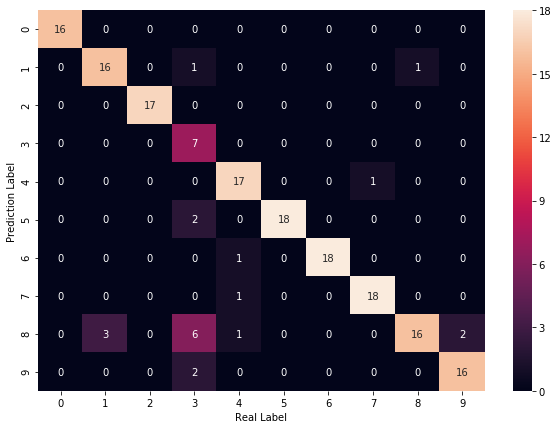

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9548546691403834

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.9893768900271824

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1019 Total connections::1447
